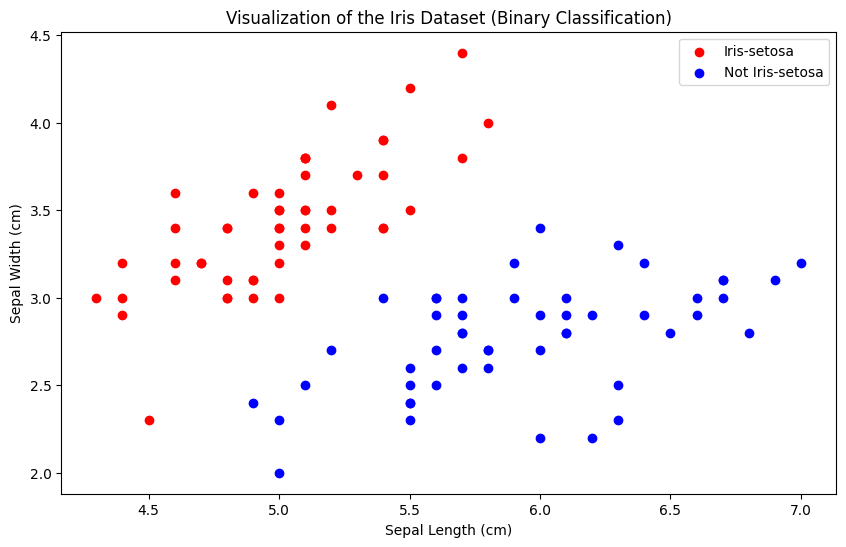

Accuracy: 95.00%


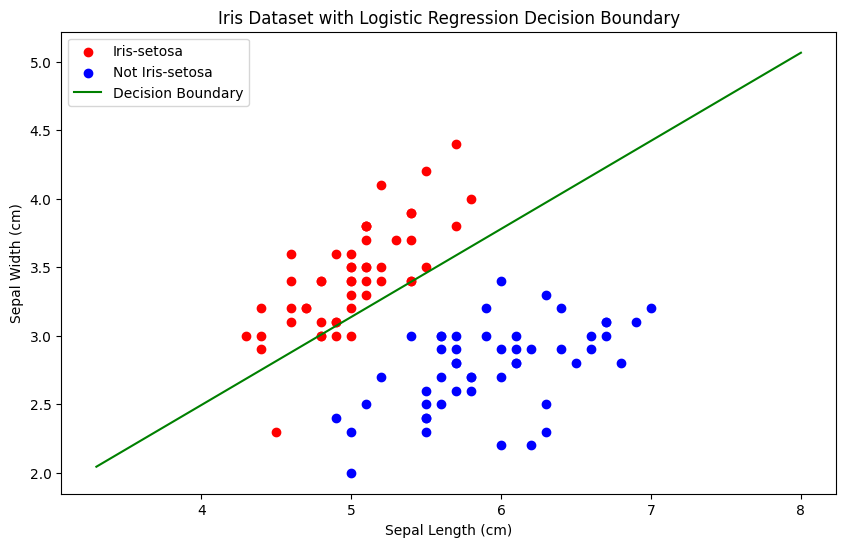

In [1]:
#2.2 Logistic Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:100, :2]  # Selecting first 100 instances and first two features (sepal length and sepal width)
y = iris.target[:100]  # Selecting first 100 instances for binary classification (Iris-setosa vs. not Iris-setosa)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Iris-setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Not Iris-setosa')

# Labeling the plot
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Visualization of the Iris Dataset (Binary Classification)')
plt.legend()

plt.show()


# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def cost_function(X, y, weights):
    m = len(y)
    h = sigmoid(X.dot(weights))
    epsilon = 1e-5  # To avoid log(0)
    cost = (-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon)).mean()
    return cost

# Define the gradient descent function
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(X.dot(weights))
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient
        cost = cost_function(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# Predict function
def predict(X, weights):
    return sigmoid(X.dot(weights)) >= 0.5

# Loading the Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:100, :2]  # Selecting first 100 instances and first two features
y = iris.target[:100]  # Selecting first 100 instances

# Adding the intercept
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initial weights
weights = np.zeros(X.shape[1])

# Hyperparameters
learning_rate = 0.01
iterations = 100
#Add more iterations


# Train the logistic regression model
weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)

# Make predictions
predictions = predict(X, weights)

# Calculate accuracy
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Define decision boundary line
slope = -(weights[1] / weights[2])
intercept = -(weights[0] / weights[2])

# Generating x-values from the dataset's range
x_values = np.array([min(X[:, 1]) - 1, max(X[:, 1]) + 1])

# Calculating y-values using the decision boundary line equation
y_values = slope * x_values + intercept

# Plotting the dataset and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='red', label='Iris-setosa')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='blue', label='Not Iris-setosa')
plt.plot(x_values, y_values, label='Decision Boundary', color='green')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset with Logistic Regression Decision Boundary')
plt.legend()

plt.show()




# Sigmoid Function
# def sigmoid(z):
# - Purpose: Calculates the sigmoid function, which is essential for logistic regression. The sigmoid function maps any real-valued number into a value between 0 and 1, making it interpretable as a probability.
# - Parameters:
#   - `z`: The input value(s), which can be a single number, a vector, or a matrix.
# - Returns: The output of the sigmoid function applied to `z`.

# Cost Function
# def cost_function(X, y, weights):
# - Purpose: Computes the cost (or loss) for a given set of weights in the logistic regression model. This function evaluates how well the model's predictions match the actual labels.
# - Parameters:
#   - `X`: The feature dataset.
#   - `y`: The actual labels for the dataset.
#   - `weights`: The weights vector for the logistic regression model.
# - Returns: The computed cost for the current weights.

# Gradient Descent Function
# def gradient_descent(X, y, weights, learning_rate, iterations):
# - Purpose: Optimizes the weights of the logistic regression model by iteratively adjusting them in the direction that reduces the cost function.
# - Parameters:
#   - `X`: The feature dataset.
#   - `y`: The actual labels for the dataset.
#   - `weights`: The initial weights vector.
#   - `learning_rate`: The size of the step the algorithm takes on each iteration.
#   - `iterations`: The number of iterations to run the gradient descent algorithm.
# - Returns: The optimized weights and a history of the cost values for each iteration.

# Predict Function
# def predict(X, weights):
# - Purpose: Makes predictions using the logistic regression model by applying the sigmoid function to the input features and then comparing the output to a threshold (usually 0.5) to determine the class label.
# - Parameters:
#   - `X`: The feature dataset for which to make predictions.
#   - `weights`: The optimized weights of the logistic regression model.
# - Returns: The predicted labels (0 or 1) for each instance in the dataset.


# ### Learning Process
# 1. Initialization: Before learning begins, the model's weights (parameters) are initialized. These weights are what the model will "learn" during the training process. The initial weights can be zeros, random numbers, or other methods for initialization.

# 2. Hypothesis Prediction: In each iteration, the model makes predictions using the current weights. This is done using the sigmoid function applied to the linear combination of input features and their corresponding weights , which produces predictions between 0 and 1.

# 3. Calculating the Gradient: The gradient of the cost function with respect to each weight is calculated. This gradient tells us how to adjust the weights to minimize the cost. It's computed by taking the derivative of the cost function.

# 4. Updating the Weights: The weights are updated by subtracting the product of the learning rate and the gradient from the current weights. This step is crucial because it's where the learning actually happens. The learning rate controls how big a step is taken in the direction that minimally increases the cost function.

# 5. Iteration and Convergence: This process is repeated for a specified number of iterations or until the cost function converges to a minimum value. Convergence means that further adjustments to the weights will not significantly reduce the cost, indicating that the model has learned the best weights given the input data and chosen architecture.

# Memory and Iterations
# - Memory Across Iterations: The "memory" of what the model has learned is stored in the weights. With each iteration, the weights are adjusted closer to the optimal values that minimize the cost function. There's no explicit memory or storage of past data points or gradients; instead, the knowledge is encapsulated in the updated weights after each iteration.

# - Cost History: While the model's knowledge is stored in the weights, the `cost_history` array is kept as a record of the cost function value at each iteration. This doesn't influence the model's learning process but serves as a useful diagnostic tool to monitor the learning process and ensure that the cost is decreasing over time, indicating successful learning.

# - Adaptation in Subsequent Iterations: The gradient calculation inherently considers how well the model's predictions match the actual labels and adjusts the weights in the direction that reduces the cost. This adjustment is based on the aggregate error across all training examples, making the learning process an iterative optimization problem that seeks to find the weight values that best map the input features to the target output.

# The essence of the learning process in logistic regression through gradient descent is an iterative refinement of the model's weights, with each iteration bringing the model closer to the optimal solution that minimizes the discrepancy between predicted and actual values.
